In [45]:
from arango import ArangoClient
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

sysdb = ArangoClient(hosts='http://localhost:8529')
arangoDb = sysdb.db('tcc_results', username=None, password=None)
collec = arangoDb.collection('tcc_results')

results = collec.find({}, limit=100000)
while results.has_more():
    ft = results.fetch()

df = pd.DataFrame(results.batch())

df['number_queries'] = df['number_queries'].astype('float64')
df['f1'] = df['f1'].astype('float64')
df['accuracy'] = df['accuracy'].astype('float64')
df['acc_cv_10'] = df['acc_cv_10'].astype('float64')
df['f1_cv_10'] = df['acc_cv_10'].astype('float64')
df = df.replace({'svc_C': {'': np.nan}, 'linear_svc_C': {'': np.nan}})
df['svc_C'] = df['svc_C'].astype('float64')
df['linear_svc_C'] = df['linear_svc_C'].astype('float64')

time_queries_df = df.loc[(df['variable'] == 'TIME_QUERY') & (df['number_queries'] != '0')][['exp_id', 'db', 'solution_number','tool', 'number_queries', 'value']]

clf_acc_df = df.loc[(df['variable'] == 'CLF_ACC')]
clf_acc_df[['exp_id', 'db', 'solution_name', 'add_ir_variables', 'tool', 'accuracy', 'f1']]

time_queries_df.astype({'number_queries': 'int64', 'value': 'float'}).groupby(['db', 'tool', 'solution_number']).mean()

clf_acc_df['train_final_score'] = clf_acc_df['acc_cv_10'] * clf_acc_df['f1_cv_10']
time_index = df.loc[(df['variable'] == 'TIME_INDEX')][['exp_id', 'tool', 'index_type', 'db', 'db_name', 'value']]
time_query = df.loc[(df['variable'] == 'TIME_QUERY') & (df['number_queries'] != 0)][['exp_id', 'tool', 'execution_type', 'db', 'db_name', 'solution_number', 'number_queries', 'value']]

sel_1_bertha_columns = ['exp_id', 'solution_name',
                     'train_final_score', 'accuracy', 'f1', 'tool', 'top_k', 'svc_C', 'add_ir_variables', 'ignore_first_result']
sel_1_bertha = clf_acc_df.loc[clf_acc_df['solution_name'] == '1_bertha'][sel_1_bertha_columns]

sel_4_tom_columns = ['exp_id', 'solution_name',
                     'train_final_score', 'accuracy', 'f1', 'tool', 'top_k', 'svc_C', 'add_ir_variables', 'ignore_first_result']
sel_4_tom = clf_acc_df.loc[clf_acc_df.groupby('exp_id')['train_final_score'].idxmax().dropna()][sel_4_tom_columns]
sel_4_tom = sel_4_tom.loc[sel_4_tom['solution_name'] == '4_tom']
# sel_2_daneshvar18 = clf_acc_df.loc[(clf_acc_df['solution_name'] == '2_daneshvar18') & (clf_acc_df['add_ir_variables'].isin([False, 'false', 'False']))][['exp_id', 'train_final_score', 'accuracy', 'f1', 'tool', 'top_k', 'linear_svc_C', 'add_ir_variables', 'ignore_first_result']]
sel_2_daneshvar18_columns = ['exp_id', 'train_final_score', 'accuracy', 'f1', 'tool', 'top_k', 'linear_svc_C', 'add_ir_variables', 
                             'ignore_first_result', 'perform_dimentionality_reduction', 'use_only_ir_variables', 'use_scaler']
sel_2_daneshvar18 = clf_acc_df.loc[(clf_acc_df['solution_name'] == '2_daneshvar18')][sel_2_daneshvar18_columns]

/home/ruan/anaconda3/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)
/home/ruan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


## Desempenho das ferramentas de armazenamento e indexação

### TIME_INDEX

In [2]:
time_index.loc[time_index['index_type'] == 'normal']

,exp_id,tool,index_type,db,db_name,value
0,2020-01-04 10:26:12.149900,arango,normal,authorprof,authorprof,500.52841305732727
2,2020-01-04 10:26:12.149900,elastic,normal,authorprof,authorprof,584.9536981582642
5,2020-01-04 10:26:12.149900,arango,normal,botgender,botgender,689.4514305591583
7,2020-01-04 10:26:12.149900,elastic,normal,botgender,botgender,878.894570350647
10,2020-01-04 10:26:12.149900,arango,normal,hyperpartisan,hyperpartisan,2.2076096534729004
12,2020-01-04 10:26:12.149900,elastic,normal,hyperpartisan,hyperpartisan,1.7883508205413818
15,2020-01-04 10:26:12.149900,arango,normal,hyperpartisan_split_42,hyperpartisan_split_42,1.7958078384399414
17,2020-01-04 10:26:12.149900,elastic,normal,hyperpartisan_split_42,hyperpartisan_split_42,1.3491945266723633
20,2020-01-04 13:44:18.742265,arango,normal,authorprof,authorprof,498.88559913635254
22,2020-01-04 13:44:18.742265,elastic,normal,authorprof,authorprof,575.429041147232


### TIME_QUERY

In [3]:
time_query.loc[(time_query['db'] == 'hyperpartisan') & (time_query['value'] != 'nan')].dropna(subset=['value'])

,exp_id,tool,execution_type,db,db_name,number_queries,value
44,2020-01-04 18:34:02.470777,elastic,training,hyperpartisan,hyperpartisan_split_42_bulk,430,0.017039375526960505
45,2020-01-04 18:42:24.423142,elastic,training,hyperpartisan,hyperpartisan_split_42_bulk,430,0.01685374836589015
46,2020-01-04 18:51:21.965459,elastic,training,hyperpartisan,hyperpartisan_split_42_bulk,430,0.016053900607796604
47,2020-01-04 18:51:21.965459,elastic,testing,hyperpartisan,hyperpartisan_split_42_bulk,215,0.015576411402502726
50,2020-01-04 19:27:10.249253,elastic,training,hyperpartisan,hyperpartisan_split_42_bulk,430,0.017093608545702556
...,...,...,...,...,...,...,...
8548,2020-01-21 10:21:40.652924,elastic,training_test,hyperpartisan,hyperpartisan_split_42_bulk,645,0.02631792615550433
8769,2020-01-21 10:25:57.665533,elastic,training_test,hyperpartisan,hyperpartisan_split_42_bulk,645,0.03631666797076085
8990,2020-01-21 10:29:55.920434,elastic,training_test,hyperpartisan,hyperpartisan_split_42_bulk,645,0.03644056098405705
9211,2020-01-21 10:40:04.283686,elastic,training_test,hyperpartisan,hyperpartisan_split_42_bulk,645,0.024939322286798047


## Desempenho dos classificadores com atributos de RI

### DB_AUTHORPROF - SOLUTION 1 - 2_daneshvar18

In [36]:
# sel_2_daneshvar18[-305:-285]
sel_2_daneshvar18.loc[sel_2_daneshvar18.groupby('exp_id')['f1'].idxmax().dropna()]

,exp_id,train_final_score,accuracy,f1,tool,top_k,linear_svc_C,add_ir_variables,ignore_first_result,perform_dimentionality_reduction,use_only_ir_variables,use_scaler
68,2020-01-04 23:56:36.242484,NaN,0.822105,0.820785,elastic,100,NaN,false,NaN,NaN,NaN,NaN
72,2020-01-05 00:08:39.282482,NaN,0.673684,0.657459,elastic,100,NaN,true,NaN,NaN,NaN,NaN
78,2020-01-05 20:01:49.675055,NaN,0.698421,0.725968,zettair,100,NaN,true,NaN,NaN,NaN,NaN
82,2020-01-06 13:03:42.329566,NaN,0.726316,0.750240,arango,100,NaN,true,NaN,NaN,NaN,NaN
86,2020-01-07 08:44:13.089672,NaN,0.713684,0.752502,elastic,100,NaN,true,NaN,NaN,NaN,NaN
90,2020-01-07 10:30:10.483597,NaN,0.745263,0.766859,zettair,10,NaN,true,NaN,NaN,NaN,NaN
139,2020-01-13 02:36:12.053429,NaN,0.713684,0.752502,elastic,10,NaN,true,NaN,NaN,NaN,NaN
143,2020-01-13 03:54:41.544824,NaN,0.822105,0.820785,elastic,100,NaN,true,NaN,NaN,NaN,NaN
147,2020-01-13 04:20:49.825033,NaN,0.673684,0.657459,elastic,100,NaN,true,NaN,NaN,NaN,NaN
306,2020-01-18 14:19:02.871078,NaN,0.822105,0.820785,elastic,100,NaN,False,False,NaN,NaN,NaN


In [37]:
top_k_100_exp_ids = ['2020-01-22 00:46:46.165082', '2020-01-22 09:44:59.320466']
cre = clf_acc_df.loc[clf_acc_df['exp_id'].isin(top_k_100_exp_ids)].dropna(subset=['linear_svc_C'])
cre = cre.loc[(cre['linear_svc_C'] <= 10) & (cre['linear_svc_C'] >= 0)]

# cre = cre.replace({'exp_id': {'2020-01-21 01:11:16.682270': 'ORIGINAL', '2020-01-20 11:56:27.013101': '+RI_ELASTIC', '2020-01-20 12:17:29.856689': '+RI_ARANGO', '2020-01-20 12:40:57.164582': '+RI_ZETTAIR'}})
cre

,_key,_id,_rev,exp_id,variable,index_type,db,tool,db_name,value,...,linear_svc_max_iter,perform_dimentionality_reduction,ir_variables_before_dim_reduction,svc_C,svc_max_iter,acc_train,acc_cv_10,f1_cv_10,use_scaler,use_only_ir_variables
9657,20200122-005443.984024,tcc_results/20200122-005443.984024,_Z6rhU3a---,2020-01-22 00:46:46.165082,CLF_ACC,NaN,authorprof,none,authorprof_bulk,0.7094736842105264,...,5000,True,False,NaN,NaN,NaN,0.731667,0.731667,NaN,NaN
9659,20200122-005444.552180,tcc_results/20200122-005444.552180,_Z6rhVay---,2020-01-22 00:46:46.165082,CLF_ACC,NaN,authorprof,none,authorprof_bulk,0.7226315789473684,...,5000,True,False,NaN,NaN,NaN,0.756000,0.756000,NaN,NaN
9661,20200122-005445.044050,tcc_results/20200122-005445.044050,_Z6rhV5e---,2020-01-22 00:46:46.165082,CLF_ACC,NaN,authorprof,none,authorprof_bulk,0.728421052631579,...,5000,True,False,NaN,NaN,NaN,0.758000,0.758000,NaN,NaN
9663,20200122-005445.538387,tcc_results/20200122-005445.538387,_Z6rhWYa---,2020-01-22 00:46:46.165082,CLF_ACC,NaN,authorprof,none,authorprof_bulk,0.7342105263157894,...,5000,True,False,NaN,NaN,NaN,0.767000,0.767000,NaN,NaN
9665,20200122-005446.114482,tcc_results/20200122-005446.114482,_Z6rhW8W---,2020-01-22 00:46:46.165082,CLF_ACC,NaN,authorprof,none,authorprof_bulk,0.7468421052631579,...,5000,True,False,NaN,NaN,NaN,0.777333,0.777333,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9978,20200122-115720.345667,tcc_results/20200122-115720.345667,_Z61_9b6---,2020-01-22 09:44:59.320466,CLF_ACC,NaN,authorprof,elastic,authorprof_bulk,0.68,...,5000,True,True,NaN,NaN,NaN,0.690333,0.690333,NaN,NaN
9980,20200122-115935.268225,tcc_results/20200122-115935.268225,_Z61CBMi---,2020-01-22 09:44:59.320466,CLF_ACC,NaN,authorprof,elastic,authorprof_bulk,0.7626315789473684,...,5000,True,True,NaN,NaN,NaN,0.719000,0.719000,NaN,NaN
9982,20200122-120156.953614,tcc_results/20200122-120156.953614,_Z61ELk----,2020-01-22 09:44:59.320466,CLF_ACC,NaN,authorprof,elastic,authorprof_bulk,0.7673684210526316,...,5000,True,True,NaN,NaN,NaN,0.699667,0.699667,NaN,NaN
9984,20200122-120428.311565,tcc_results/20200122-120428.311565,_Z61GfXu---,2020-01-22 09:44:59.320466,CLF_ACC,NaN,authorprof,elastic,authorprof_bulk,0.5436842105263158,...,5000,True,True,NaN,NaN,NaN,0.713333,0.713333,NaN,NaN


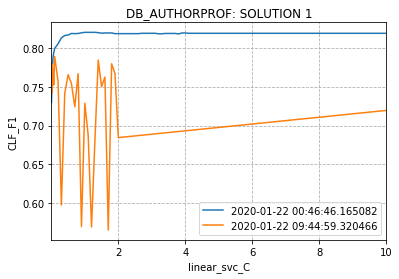

In [38]:
ax = cre.set_index('linear_svc_C').groupby('exp_id').f1.plot(legend=True)
plt.ylabel('CLF_F1')
plt.title('DB_AUTHORPROF: SOLUTION 1')
ax[0].grid(linestyle='--')
# ax[0].set_xticks(np.arange(0, 11, step=1))
# ax[0].set_ylim(0.6, 0.86)

# ax[0].lines[0].set_dashes([1, 1, 10, 2])
# ax[0].lines[1].set_dashes([1, 2 ])
# ax[0].lines[2].set_dashes([1, 2 ])
# ax[0].lines[3].set_dashes([1, 8 ])

### DB_HYPERPARTISAN - SOLUTION 1 - 1_bertha

In [48]:
sel_1_bertha.loc[sel_1_bertha['top_k'] == '100']
df.columns

Index(['_key', '_id', '_rev', 'exp_id', 'variable', 'index_type', 'db', 'tool',
       'db_name', 'value', 'indexName', 'bm25_b', 'bm25_k1', 'bm25_k3',
       'top_k', 'add_ir_variables', 'solution_number', 'solution_name',
       'execution_type', 'train_input', 'number_queries', 'test_input',
       'saved_model1', 'saved_model2', 'saved_model3', 'train_epochs', 'TP',
       'FP', 'TN', 'FN', 'accuracy', 'f1', 'train_data_folder',
       'test_data_folder', 'ir_top_k', 'ignore_first_result', 'random_seed',
       'train_final_score', 'classifier', 'linear_svc_C',
       'linear_svc_max_iter', 'perform_dimentionality_reduction',
       'ir_variables_before_dim_reduction', 'svc_C', 'svc_max_iter',
       'acc_train', 'acc_cv_10', 'f1_cv_10', 'use_scaler',
       'use_only_ir_variables'],
      dtype='object')

### DB_HYPERPARTISAN - SOLUTION 2 - 4_tom

In [39]:
sel_4_tom.loc[sel_4_tom['top_k'] == '100']

,exp_id,solution_name,train_final_score,accuracy,f1,tool,top_k,svc_C,add_ir_variables,ignore_first_result
1168.0,2020-01-19 16:08:36.492091,4_tom,0.654970,0.809302,0.705036,arango,100,NaN,True,False
1373.0,2020-01-19 16:14:03.052067,4_tom,0.640000,0.800000,0.676692,arango,100,NaN,False,False
1593.0,2020-01-19 16:28:00.112359,4_tom,0.640000,0.800000,0.676692,arango,100,NaN,False,False
3268.0,2020-01-20 11:18:21.372882,4_tom,0.658740,0.800000,0.681481,elastic,100,1.1,True,False
3502.0,2020-01-20 11:56:27.013101,4_tom,0.643726,0.818605,0.723404,elastic,100,1.6,True,True
3926.0,2020-01-20 12:17:29.856689,4_tom,0.643726,0.790698,0.656489,arango,100,0.7,True,True
4382.0,2020-01-20 12:40:57.164582,4_tom,0.643726,0.841860,0.760563,zettair,100,1.4,True,True
5268.0,2020-01-21 01:17:45.641786,4_tom,0.654970,0.809302,0.705036,arango,100,1.5,True,False
5702.0,2020-01-21 01:28:07.731470,4_tom,0.658740,0.800000,0.681481,elastic,100,1.1,True,False
6194.0,2020-01-21 01:43:55.264790,4_tom,0.724478,0.823256,0.746667,zettair,100,3.6,True,False


In [41]:
# top_k = 100, exp ids
top_k_100_exp_ids = ['2020-01-21 01:11:16.682270', '2020-01-20 11:56:27.013101', '2020-01-20 12:17:29.856689', '2020-01-20 12:40:57.164582']
cre = clf_acc_df.loc[clf_acc_df['exp_id'].isin(top_k_100_exp_ids)].dropna(subset=['svc_C'])
cre['svc_C'] = cre.svc_C.map(lambda x: '{:.8f}'.format(x)) 
cre = cre.loc[(cre['svc_C'].astype('float64') <= 10) & (cre['svc_C'].astype('float64') >= 0.1)]

# cre = cre[6:106]
cre['f1'] = cre['f1'].astype('float64')
cre['accuracy'] = cre['accuracy'].astype('float64')
cre['svc_C'] = cre['svc_C'].astype('float64')
cre = cre.replace({'exp_id': {'2020-01-21 01:11:16.682270': 'ORIGINAL', '2020-01-20 11:56:27.013101': '+RI_ELASTIC', '2020-01-20 12:17:29.856689': '+RI_ARANGO', '2020-01-20 12:40:57.164582': '+RI_ZETTAIR'}})

(0.6, 0.8)

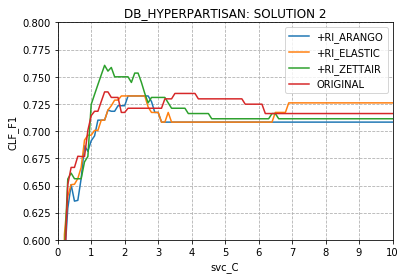

In [42]:
ax = cre.set_index('svc_C').groupby('exp_id').f1.plot(legend=True)
plt.ylabel('CLF_F1')
plt.title('DB_HYPERPARTISAN: SOLUTION 2')
ax[0].grid(linestyle='--')
ax[0].set_xticks(np.arange(0, 11, step=1))
ax[0].set_ylim(0.6, 0.8)

# ax[0].lines[0].set_dashes([1, 1, 10, 2])
# ax[0].lines[1].set_dashes([1, 2 ])
# ax[0].lines[2].set_dashes([1, 2 ])
# ax[0].lines[3].set_dashes([1, 8 ])

(0.74, 0.86)

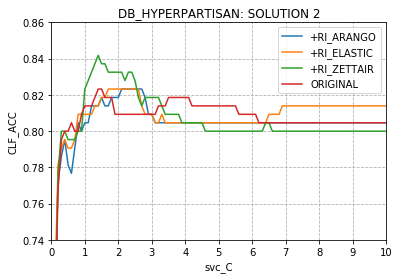

In [43]:
ax = cre.set_index('svc_C').groupby('exp_id').accuracy.plot(legend=True)
plt.ylabel('CLF_ACC')
plt.title('DB_HYPERPARTISAN: SOLUTION 2')
ax[0].grid(linestyle='--')
ax[0].set_xticks(np.arange(0, 11, step=1))
ax[0].set_ylim(0.74, 0.86)
